In [7]:
library(pheatmap)

In [8]:
data <- read.csv("./Result_NvP53/NvP53_AtacRna_KoWt_Final_20221008/Explain/ct_tf_influe.atac.csv",row.names = 1,check.names = F)
cellanno_atac = c("P53_1","P53_10","P53_11","P53_12","P53_13","P53_14","P53_15","P53_16","P53_17","P53_18","P53_19",
                  "P53_2","P53_20","P53_22","P53_24","P53_25",
                  "P53_3","P53_4","P53_5","P53_6","P53_7","P53_8","P53_9",
                  "WT_1","WT_10","WT_11","WT_12","WT_13","WT_15",
                  "WT_2","WT_20","WT_21","WT_22","WT_23","WT_24","WT_25",
                  "WT_3","WT_4","WT_5","WT_6","WT_7","WT_8","WT_9")
rownames(data) <- cellanno_atac
data <- t(data)
dim(data); data[1:5,1:4]

[1] 695  43

,P53_1,P53_10,P53_11,P53_12
4921501E09Rik,0.75174659,0.2678632,-1.3675777,0.1529440
AW822073,0.01830742,-0.8610510,-0.8250555,-2.4064350
Adnp,0.18692307,-0.1290493,-1.3997332,-1.8336554
Ahr,-0.71435654,-0.0379470,-1.4059062,0.3194286
Aire,0.18692307,-0.1290493,-1.3997332,-1.8336554


In [9]:
Ann <- read.csv("./anno.pb_cluster.csv")
Ann_P53 <- Ann[Ann$group == "P53",]
Ann_WT <- Ann[Ann$group == "WT",]

p53_tf <- data[,grep("P53",colnames(data))]
wt_tf <- data[,grep("WT",colnames(data))]

In [23]:
total_tf <- cbind(p53_tf,wt_tf)
total_Ann <- rbind(Ann_P53,Ann_WT)


rownames(total_Ann) <- total_Ann$pb_cluster
Ann_USE <- total_Ann
rownames(Ann_USE) <- Ann_USE$pb_cluster

total_tf <- as.data.frame(total_tf)
total_tf_temp <- total_tf[, as.character(intersect(colnames(total_tf),Ann_USE$pb_cluster))]
Ann_USE <- Ann_USE[as.character(colnames(total_tf_temp)),]

Ann_USE_p53 <- Ann_USE[Ann_USE$group == "P53",]
Ann_USE_p53 <- Ann_USE_p53[order(Ann_USE_p53$Cellcluster),]

Ann_USE_WT <- Ann_USE[Ann_USE$group == "WT",]
Ann_USE_WT <- Ann_USE_WT[order(Ann_USE_WT$Cellcluster),]
Ann_USE <- rbind(Ann_USE_p53,Ann_USE_WT)

total_tf_temp <- total_tf_temp[, as.character(Ann_USE$pb_cluster)]


In [24]:
Lineage = factor(Ann_USE$Cellcluster)
Type <- factor(Ann_USE$group)
ann_row <- data.frame(
  Type = Type,
  Lineage = Lineage
  
)
rownames(ann_row) <- colnames(total_tf_temp)

In [25]:
color_regions = c("#E6AB02", "#66A61E", "#D95F02", "#1B9E77", "#E7298A", "#E31A1C", "#A6761D", "#B2DF8A", "#FFFF99", "#7570B3", "#FF7F00", "#A65628", "#B3CDE3", "#BC80BD", "#A6CEE3","#984EA3", "#CCEBC5","#E41A1C","#4DAF4A","#BEBADA","#B3DE69","#CAB2D6","#FFFFB3","#33A02C","#B15928", "#6A3D9A","#FBB4AE","blue","#FB8072","#FFFF33","#CCEBC5","#A6761D","#2c7fb8","#fa9fb5","#BEBADA")
names(color_regions) = c("Secretory" ,"Muscle" ,"Neuron" ,"Immune" , "Epithelial","Glia","Proliferating","Immune","Parenchymal","Stromal","Phagocytes","Pharynx","Rectum","Coelomocytes","Intestine","Hepatocyte","Germline","Endothelial","Erythroid","Testis","Unknown","Midgut","Hemocytes" ,"Hindgut","Embryo","Fat","SalivaryGland","Gastrodermis","DigFilaments","Pigment","BasementMembrane","Endoderm","Mesenchyme","FatBody","Female")
color_regions_use = color_regions[as.character(levels(Lineage))]
which(is.na(color_regions_use))

annotion_colors <- list(
  Type =  c(P53 = "#FF9200FF", WT= "#105BA2"),
  Lineage = color_regions_use
)

named integer(0)

,X,group,cluster,anno,pb_cluster,Cellcluster
P53_13,7368,P53,13,Epithelium_3,P53_13,Epithelial
P53_2,7352,P53,2,Epithelium(AT2),P53_2,Epithelial


,P53_13,P53_2,P53_24,P53_25,P53_3,P53_6,P53_20,P53_9,P53_10,P53_11,...,WT_12,WT_21,WT_23,WT_5,WT_8,WT_15,WT_22,WT_7,WT_1,WT_4
4921501E09Rik,0.4489587,-1.861060,0.6660329,-2.0000000,1.5194817,-2.0000000,-0.2507749,-0.8825088,0.2678632,-1.3675777,...,0.2899695,1.427787,0.1162652,0.3972439,1.807672,-0.1420129,0.5247493,-0.9118754,-0.1800265,0.3037176
AW822073,0.9664876,1.278294,1.5040161,-0.2889748,0.2581691,-0.2520964,-0.6655571,-0.5713149,-0.8610510,-0.8250555,...,1.9366537,1.182366,0.9524678,-1.1783730,-1.064105,0.3838882,-3.8325553,-0.6030163,-1.7897905,1.6580580


png 
  2

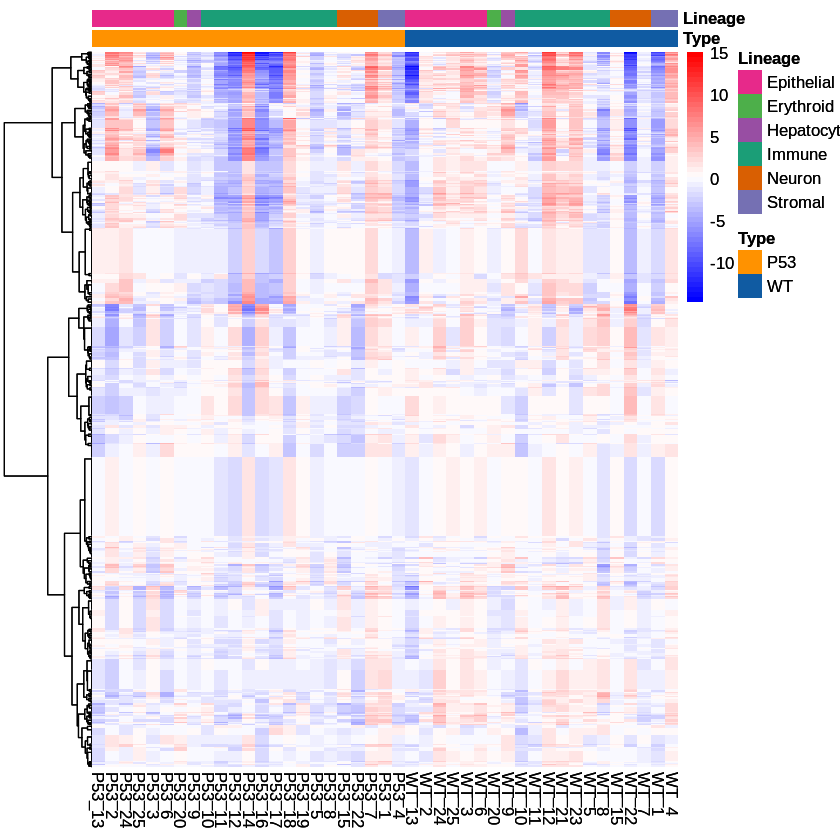

In [26]:

#top <- reshape2::melt(as.matrix(total_tf_temp))
#top <- top[top$value >=3,]
#temp <- total_tf_temp[as.character(unique(top$Var1)),]
temp <- total_tf_temp

temp[temp>35] = 35
Ann_USE[1:2,]
temp[1:2,]
#colnames(temp) <- paste(colnames(temp),Ann_USE$anno,sep = "|")

library(pheatmap)
color_use <- colorRampPalette(c("blue","white","red"))(50)
t1 <- pheatmap(temp,
               cluster_cols = F,
               clustering_method = "ward.D2",
               color = color_use,
               annotation_colors = annotion_colors,
               show_rownames = F,
             #  show_colnames = F,
               annotation_col = ann_row)
t1

out_pdf <- "./Figure_ct_tf_influe.atac_pheatmap.pdf"
pdf(out_pdf,w=10,h=10)
print(t1)
dev.off()


temp <- temp[t1$tree_row$order,]
write.table(temp,"Figure_ct_tf_influe.atac_pheatmap.txt",sep = "\t",quote = F)
